## Importing the libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings('ignore')

## Importing the datasets

In [2]:
df = pd.read_csv('Default.csv')

#Glimpse of Data
df.head()

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13
2,No,No,1073.55,31767.14
3,No,No,529.25,35704.49
4,No,No,785.66,38463.50


# Let's check the no.of Observations and no. of variables

In [5]:
print("The number of rows(observations) is", df.shape[0], '\n' 'The number od Columns(Variables) is', df.shape[1])

The number of rows(observations) is 10000 
The number od Columns(Variables) is 4


# Descriptive Statistics for the continuous variables

In [6]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374877,33516.981852
std,483.714957,13336.639582
min,0.000000,771.970000
25%,481.732500,21340.460000
50%,823.635000,34552.645000
75%,1166.305000,43807.730000
max,2654.320000,73554.230000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


# Univariate Analysis - Balance and Income variables

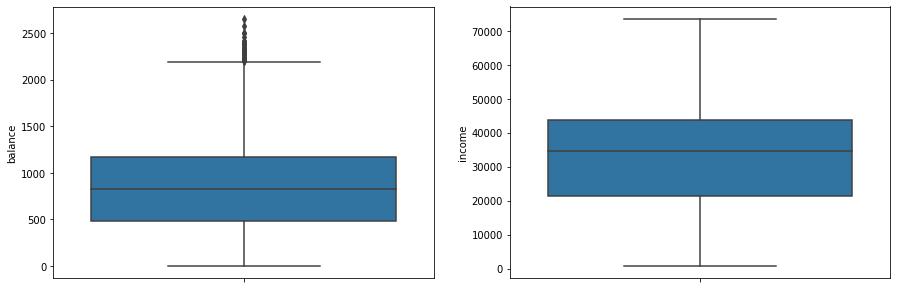

In [8]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(y = df['balance'])

plt.subplot(1,2,2)
sns.boxplot(y = df['income'])

plt.show()

# Univariate Analysis - Students and Default variables

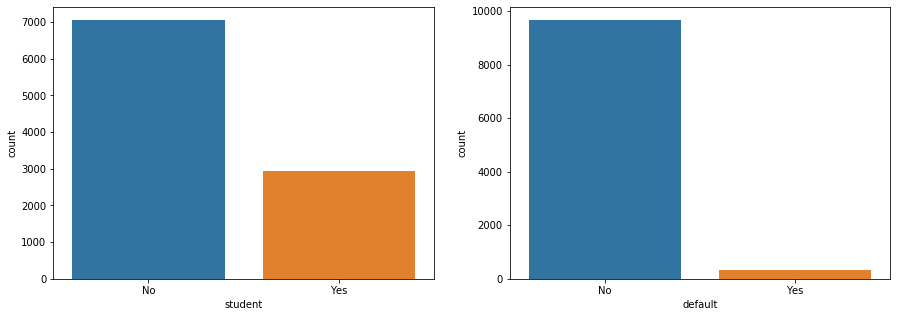

In [19]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(x = df['student'])

plt.subplot(1,2,2)
sns.countplot(x = df['default'])

plt.show()

#boxplot can be done only for continuous variables

By looking at default we can say that it's an imbalanced dataset

# Now, let's check the basic measures of descriptive stats for the categorical variables

In [12]:
df['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [3]:
df['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [4]:
df[df['default'] == 'Yes'].head()

,default,student,balance,income
136,Yes,Yes,1487.00,17854.40
173,Yes,Yes,2205.80,14271.49
201,Yes,Yes,1774.69,20359.51
206,Yes,No,1889.60,48956.17
209,Yes,Yes,1899.39,20655.20


## Checking proportions of default

In [18]:
df['default'].value_counts(normalize=True)

No     0.9667
Yes    0.0333
Name: default, dtype: float64

## Data seems highly imbalanced

## Bivariate Analyiss: Default vs Other variables

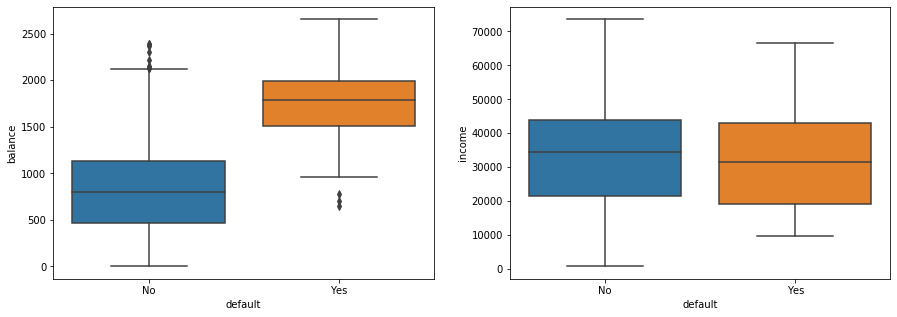

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x='default', y='balance', data=df)

plt.subplot(1,2,2)
sns.boxplot(x='default', y='income', data=df)

plt.show()

Inference: Defaulters seem to have higher outstanding balance compared to non-defaulter
Defaulter and non-defaulter income seems similar (not much difference)

In [22]:
df.head(2)

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13


In [23]:
pd.crosstab(df['student'], df['default'], normalize ='index').round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


Inference: 4 percent chance of students being defaulter, 3 percent chance of non-students being defaulter

## Check for correlation between independent variables

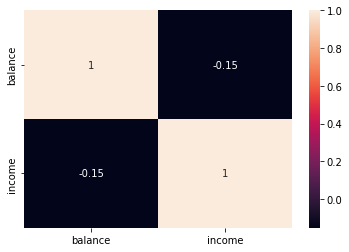

In [24]:
sns.heatmap(df[['balance','income']].corr(), annot = True)

Inference: weak correlation

# Check for missing values

In [27]:
df.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

###  There is no missing data in the dataset

# Treating outliers present in the 'balance' variable

In [28]:
#IQR method since its box plot

Q1,Q3 = df['balance'].quantile([.25,.75])
IQR = Q3 -Q1

#LL:lower limit
#UL: upper limit

LL= Q1 - 1.5*IQR
UL= Q3 + 1.5*IQR

In [32]:
print(Q1)
print()
print(Q3)
print()
print(IQR)
print()
print(LL)
print()
print(UL)

481.73249999999996

1166.305

684.5725000000001

-545.1262500000001

2193.16375


upper limit is 2193.16, lower limit is -545.12 ; anything above UL and below LL is an __outlier__

In [29]:
df_up = df[df['balance'] > UL]
df_up

,default,student,balance,income
173,Yes,Yes,2205.80,14271.49
1136,Yes,No,2499.02,51504.29
1160,Yes,Yes,2502.68,14947.52
1359,Yes,No,2220.97,40725.10
1502,Yes,Yes,2332.88,11770.23
1609,Yes,Yes,2269.95,18021.11
2096,Yes,Yes,2261.85,20030.17
2140,No,Yes,2308.89,19110.27
2929,Yes,Yes,2387.31,28296.91
3162,Yes,Yes,2415.32,17429.50


In [33]:
df_low = df[df['balance'] < LL]
df_low

,default,student,balance,income


### we see there are several outliers above UL but no outliers below LL

In [36]:
df_up['default'].count()

31

In [37]:
df_up['default'].value_counts(normalize=True)

Yes    0.83871
No     0.16129
Name: default, dtype: float64

#### Out of 31 outliers , 83 % outliers are defaulters, rest aren't

## Handling outliers

In [38]:
#convert all the values which are above UL  to the UL ; i.e if UL = 2193, and outliers = 2838 or 2561, they will convert to 2193
df['balance'] = np.where(df['balance']>UL,UL,df['balance'])

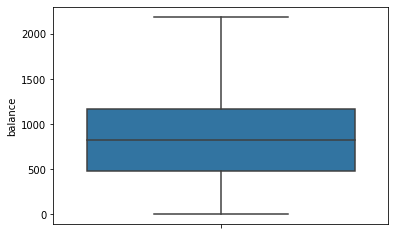

In [39]:
sns.boxplot(y=df['balance'])

### Now, outliers have been replaced with capping/transformation method

# Start of Credit Risk Modelling PD

### Transforming categorical variable into 1 and 0 using pandas get_dummies: One Hot Encoder method

In [40]:
# from sklearn import LabelEncoder

df = pd.get_dummies(df, drop_first=True) #drop first means Default_no and student_no will be removed

# Getting top 10 Rows

In [42]:
df.head(10)

,balance,income,default_Yes,student_Yes
0,729.53,44361.63,0,0
1,817.18,12106.13,0,1
2,1073.55,31767.14,0,0
3,529.25,35704.49,0,0
4,785.66,38463.50,0,0
5,919.59,7491.56,0,1
6,825.51,24905.23,0,0
7,808.67,17600.45,0,1
8,1161.06,37468.53,0,0
9,0.00,29275.27,0,0


## Relabeling the columns as per original names

In [43]:
df.columns = ['balance', 'income', 'default','student']
df

,balance,income,default,student
0,729.53,44361.63,0,0
1,817.18,12106.13,0,1
2,1073.55,31767.14,0,0
3,529.25,35704.49,0,0
4,785.66,38463.50,0,0
...,...,...,...,...
9995,711.56,52992.38,0,0
9996,757.96,19660.72,0,0
9997,845.41,58636.16,0,0
9998,1569.01,36669.11,0,0


## Split the data into ind and dep variable

In [44]:
x = df.drop('default', axis =1)
y = df['default']

In [45]:
x.head()

,balance,income,student
0,729.53,44361.63,0
1,817.18,12106.13,1
2,1073.55,31767.14,0
3,529.25,35704.49,0
4,785.66,38463.50,0


In [46]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: default, dtype: uint8

# Partitioning the data into train and test

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =0.3, random_state=21, stratify = y)

In [49]:
print(x_train.shape)
print(x_test.shape)

(7000, 3)
(3000, 3)


# Why stratify = y?
### please note, because this data is highly imbalanced and could possibly result into different proportions in the y variable between train and test set`

In [50]:
print(y_train.value_counts(normalize=True).round(2))
print()
print(y_test.value_counts(normalize=True).round(2))

0    0.97
1    0.03
Name: default, dtype: float64

0    0.97
1    0.03
Name: default, dtype: float64


In [ ]:
# this is the result of stratify = y, both train and test have defaulter yes and no

## Treating target imbalance using SMOTE

In [51]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state =33, sampling_strategy = 0.75) # sampling_strategy: 75 % genuine data, 25% defaulter data


In [52]:
x_res,y_res = sm.fit_resample(x_train, y_train)

In [53]:
print(y.shape)
print(' ')
print(y_res.shape)

(10000,)
 
(11842,)


In [54]:
y.value_counts()

0    9667
1     333
Name: default, dtype: int64

In [55]:
y_res.value_counts()

0    6767
1    5075
Name: default, dtype: int64

### now its balanced

In [56]:
df_smote = pd.concat([x_res,y_res], axis = 1)

In [57]:
#cbalanced dataset - smote
df_smote.groupby('default').mean()

,balance,income,student
default,,,
0,807.913022,33555.565605,0.288902
1,1748.067687,31074.712267,0.337537


In [58]:
# original dataset - imbalanced dataset
df.groupby('default').mean()

,balance,income,student
default,,,
0,803.870400,33566.166610,0.291404
1,1736.593536,32089.146847,0.381381


# Model Building using logistic regression for "Probability at default"

### The equation of the logistic regression by which we predict the corresponding probabilities and then go on to predict a discrete target variable is y = 1/(1+e^-z)

In [ ]:
# from sklearn.linear_model import LogisticRegression

### if we want to do hypothesis testing then instead of sklearn, we will take the statsmodel (statistical algorithm)

## Now, importing statsmodels odules

In [59]:
import statsmodels.formula.api as SM

## Creating logistic regression equation and sorting it in F_1

### model = SM.logit(formula='Dep Variable ~ Summation(Independent variable :k)', data = Data Frame containing the required values).fit()

In [60]:
df.columns

Index(['balance', 'income', 'default', 'student'], dtype='object')

In [61]:
train = pd.concat([x_train,y_train], axis=1)
train_smote = pd.concat([x_res,y_res], axis=1)
test = pd.concat([x_test,y_test], axis=1)

In [62]:
train

,balance,income,student,default
1919,595.07,29842.89,0,0
8008,290.68,37603.97,0,0
591,758.47,38018.15,0,0
2020,500.65,31353.75,0,0
3750,1391.41,30427.20,0,0
...,...,...,...,...
7367,771.02,47614.74,0,0
4264,1258.88,40858.87,0,0
4333,1045.34,29601.40,1,0
808,1306.77,56640.63,0,0


In [63]:
print(train.shape)
print()
print(train_smote.shape)
print()
print(test.shape)

(7000, 4)

(11842, 4)

(3000, 4)


In [65]:
f_1 = 'default ~ balance + income + student'

## Fitting the logistic regression model on imbalanced dataset

In [66]:
model1 = SM.logit(formula = f_1, data=train).fit()

Optimization terminated successfully.
         Current function value: 0.078006
         Iterations 10


In [67]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6996
Method:                           MLE   Df Model:                            3
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                  0.4657
Time:                        15:59:02   Log-Likelihood:                -546.04
converged:                       True   LL-Null:                       -1021.9
Covariance Type:            nonrobust   LLR p-value:                5.419e-206
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.4580      0.578    -18.080      0.000     -11.592      -9.324
balance        0.0059      0.000     20.744      0.000       0.005       0.006
income      -1.53e-05   9.98e-06     -1.534      0.125   -3.49e-05    4.25e-06
student       -1.0130      0.282     -3.592      0.000      -1.566      -0.460
==============================================================================

Possibly complete quasi-separation: A fraction 0.16 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### if p value <= 0.05 then consider that variable (alt hypothesis)
### if p value > 0.05 then reject that variable(null hypothesis)

#### Here, income value is having p value > 0.0.05. Income is insignificant for us

## Validating the model on train set

In [68]:
y_pred_train = np.where(model1.predict(train)>0.5,1,0)

In [71]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [72]:
confusion_matrix(y_train,y_pred_train)

array([[6737,   30],
       [ 158,   75]], dtype=int64)

In [73]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6767
           1       0.71      0.32      0.44       233

    accuracy                           0.97      7000
   macro avg       0.85      0.66      0.72      7000
weighted avg       0.97      0.97      0.97      7000



## we see that recall value of defaulter is very very low, it's a blunder

## Validating the model on test set

In [74]:
y_pred_test = np.where(model1.predict(test)>0.5,1,0)

In [75]:
confusion_matrix(y_test,y_pred_test)

array([[2888,   12],
       [  66,   34]], dtype=int64)

In [76]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2900
           1       0.74      0.34      0.47       100

    accuracy                           0.97      3000
   macro avg       0.86      0.67      0.73      3000
weighted avg       0.97      0.97      0.97      3000



### Model is not overfiting but the recall value is really poor. Basis recall, can we say high bias

# Fitting the logistic Regression model on Balanced Data

In [77]:
model2 =  SM.logit(formula = f_1, data=train_smote).fit()

Optimization terminated successfully.
         Current function value: 0.236659
         Iterations 8


In [78]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                11842
Model:                          Logit   Df Residuals:                    11838
Method:                           MLE   Df Model:                            3
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                  0.6535
Time:                        16:13:27   Log-Likelihood:                -2802.5
converged:                       True   LL-Null:                       -8087.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.6320      0.240    -35.967      0.000      -9.102      -8.162
balance        0.0072      0.000     51.698      0.000       0.007       0.007
income      -2.84e-05   4.09e-06     -6.935      0.000   -3.64e-05   -2.04e-05
student       -1.7174      0.120    -14.283      0.000      -1.953      -1.482
==============================================================================
"""

### we observe that income is also significant here since p value<0.05

# Validating the model on train_smote set

In [81]:
y_pred_train_smote = np.where(model2.predict(train_smote)>0.5,1,0)

In [82]:
confusion_matrix(y_res,y_pred_train_smote)

array([[6111,  656],
       [ 500, 4575]], dtype=int64)

In [83]:
print(classification_report(y_res,y_pred_train_smote))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      6767
           1       0.87      0.90      0.89      5075

    accuracy                           0.90     11842
   macro avg       0.90      0.90      0.90     11842
weighted avg       0.90      0.90      0.90     11842



### We observe that the recall score for defaulter is very good

In [84]:
print(accuracy_score(y_res,y_pred_train_smote))

0.9023813545009289


## Please note, accuracy is not a good measurement when we have imbalanced dataset or probability values

# Validating the model on test set for smote

In [85]:
y_pred_test_smote = np.where(model2.predict(test)>0.5,1,0)

In [86]:
confusion_matrix(y_test,y_pred_test_smote)

array([[2634,  266],
       [  18,   82]], dtype=int64)

In [87]:
print(classification_report(y_test,y_pred_test_smote))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      2900
           1       0.24      0.82      0.37       100

    accuracy                           0.91      3000
   macro avg       0.61      0.86      0.66      3000
weighted avg       0.97      0.91      0.93      3000



### the recall value is good, less than 10 percent variance from train data

In [88]:
print(accuracy_score(y_test,y_pred_test_smote))

0.9053333333333333


In [89]:
# accuracy is also somewhat same

# Conclusion

#### We can see that we get better recall value after balancing the data, hence we prefer to go with model2

In [6]:
!pip install -U notebook-as-pdf

  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Attempting uninstall: certifi
    Found existing installation: certifi 2019.11.28
    Uninstalling certifi-2019.11.28:
      Successfully uninstalled certifi-2019.11.28


In [1]:
!pip install pyppeteer